# Neural RDM Comparisons

In [1]:
import rsatoolbox
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
import numpy as np

In [2]:
dataset_v1 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000')
dataset_v2 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2')

In [3]:
def col_norm(x):
    return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

def row_norm(x):
    return (x - x.min(axis=1, keepdims=True)) / (x.max(axis=1, keepdims=True) - x.min(axis=1, keepdims=True))

In [4]:
fmri_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'MEAN_vcAtlas_CORR_RDMs.h5'))

In [4]:
dnn_rdms = rsatoolbox.rdm.rdms.load_rdm('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_ResNet50/standard_ResNet50.h5')

In [5]:
corr = rsatoolbox.rdm.compare(fmri_rdms, dnn_rdms, method='corr')

In [6]:
rho_a = rsatoolbox.rdm.compare(fmri_rdms, dnn_rdms, method='rho-a')

In [7]:
rho_a

array([[0.012669529415797093, 0.018594057506300395, 0.021492726728098162,
        0.04540504864060772, 0.03060846306156568],
       [0.01070934583954188, 0.014075137554184183, 0.015797916034951932,
        0.03471594570327531, 0.02476357279712689],
       [0.01677488783983809, 0.02970345739323116, 0.03561417753012811,
        0.08123516000917506, 0.0526000314138753],
       [0.011811972584574245, 0.016064411439994018, 0.018112223961880405,
        0.039599814278550076, 0.029679877609583384],
       [0.009412965788359434, 0.018738849482456577, 0.021352755309119086,
        0.029703406956208156, 0.02383113210795886],
       [0.010726080086194106, 0.016781217438471073, 0.019129007884315034,
        0.026275266382573343, 0.019793566565721968],
       [0.00625223377446551, 0.010968983054253562, 0.012835281422941682,
        0.019193765076135884, 0.014148025170439057],
       [0.007999229115661597, 0.012776113186563194, 0.015008041653856993,
        0.028667936469781947, 0.020564047379409596

In [17]:
corr_norm = (corr - corr.min(axis=0)) / (corr.max(axis=0) - corr.min(axis=0))

Text(0.5, 1.0, 'ResNet50 vs. Mean FMRI RDM Correlation')

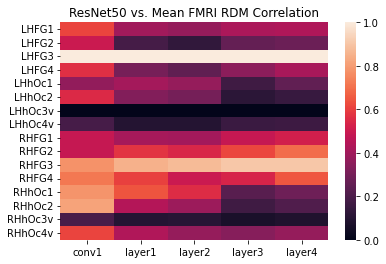

In [54]:
fig, ax = plt.subplots(facecolor='white')
ax = sns.heatmap(col_norm(corr), xticklabels=dnn_rdms.rdm_descriptors['layer'], yticklabels=fmri_rdms.rdm_descriptors['roi'], ax=ax)
ax.set_title('ResNet50 vs. Mean FMRI RDM Correlation')

Text(0.5, 1.0, 'ResNet50 vs. Mean FMRI RDM rho_a')

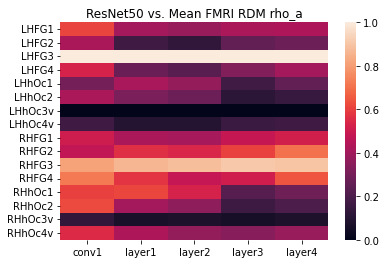

In [52]:
ax = sns.heatmap(col_norm(rho_a.astype(float)), xticklabels=dnn_rdms.rdm_descriptors['layer'], yticklabels=fmri_rdms.rdm_descriptors['roi'])
ax.set_title('ResNet50 vs. Mean FMRI RDM rho_a')

In [19]:
alexnet_rdms = rsatoolbox.rdm.rdms.load_rdm('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_AlexNet/standard_AlexNet.h5')

In [20]:
alexnet_corr = rsatoolbox.rdm.compare(fmri_rdms, alexnet_rdms, method='corr')
alexnet_rho_a = rsatoolbox.rdm.compare(fmri_rdms, alexnet_rdms, method='rho-a')

Text(0.5, 1.0, 'AlexNet vs. Mean FMRI RDM Correlation')

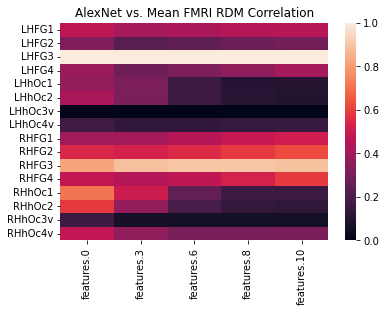

In [55]:
fig, ax = plt.subplots(facecolor='white')
ax = sns.heatmap(col_norm(alexnet_corr), xticklabels=alexnet_rdms.rdm_descriptors['layer'], yticklabels=fmri_rdms.rdm_descriptors['roi'])
ax.set_title('AlexNet vs. Mean FMRI RDM Correlation')

<AxesSubplot:>

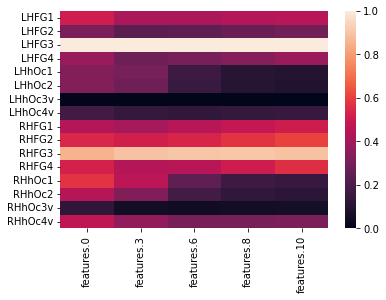

In [29]:
sns.heatmap(col_norm(alexnet_rho_a.astype(float)), xticklabels=alexnet_rdms.rdm_descriptors['layer'], yticklabels=fmri_rdms.rdm_descriptors['roi'])

<AxesSubplot:>

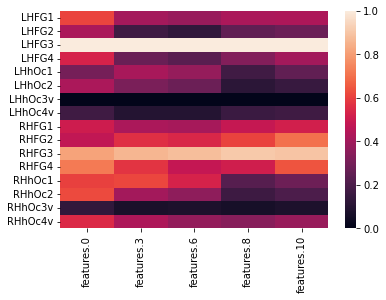

In [31]:
sns.heatmap(col_norm(rho_a.astype(float)), xticklabels=alexnet_rdms.rdm_descriptors['layer'], yticklabels=fmri_rdms.rdm_descriptors['roi'])

In [33]:
csi2_rdms = rsatoolbox.rdm.load_rdm(str(dataset_v2 / 'CSI2_vcAtlas_CORR_RDMs.h5'))

In [34]:
csi2_corr = rsatoolbox.rdm.compare(csi2_rdms, alexnet_rdms, method='corr')

<AxesSubplot:>

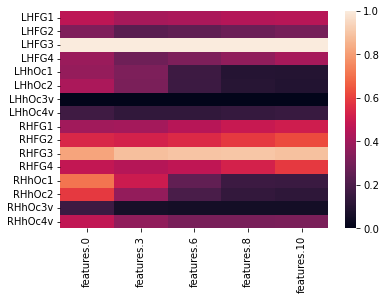

In [35]:
sns.heatmap(col_norm(alexnet_corr), xticklabels=alexnet_rdms.rdm_descriptors['layer'], yticklabels=fmri_rdms.rdm_descriptors['roi'])

## Plot for All Atlases

In [6]:
for atlas in ['vcAtlas', 'visfAtlas', 'BOLD5000']:
    atlas_path = dataset_v2 / f'MEAN_{atlas}_CORR_RDMs.h5'
    print((atlas_path, atlas_path.exists()))

(PosixPath('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_vcAtlas_CORR_RDMs.h5'), True)
(PosixPath('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_visfAtlas_CORR_RDMs.h5'), True)
(PosixPath('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_BOLD5000_CORR_RDMs.h5'), True)


In [13]:
for dnn in ['ResNet50', 'efficientnet', 'mobilenet', 'AlexNet']:
    dnn_path = list((dataset_v2 / 'rdms').glob(f'**/*{dnn}*.h5'))
    print((dnn_path, dnn_path[0].exists()))

([PosixPath('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_ResNet50/standard_ResNet50.h5')], True)
([PosixPath('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_efficientnet_b0/standard_efficientnet_b0.h5')], True)
([PosixPath('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_mobilenet_v2/standard_mobilenet_v2.h5')], True)
([PosixPath('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_AlexNet/standard_AlexNet.h5')], True)


In [28]:
corr = {}
for dnn in ['ResNet50', 'efficientnet', 'mobilenet', 'AlexNet']:
    corr[dnn] = {}
    dnn_path = next((dataset_v2 / 'rdms').glob(f'**/*{dnn}*.h5'))
    print(dnn_path)
    dnn_rdm = rsatoolbox.rdm.rdms.load_rdm(dnn_path, file_type='hdf5')
    for atlas in ['vcAtlas', 'visfAtlas', 'BOLD5000']:
        atlas_path = dataset_v2 / f'MEAN_{atlas}_CORR_RDMs.h5'
        print(f'\t{atlas_path}')
        atlas_rdm = rsatoolbox.rdm.rdms.load_rdm(atlas_path, file_type='hdf5')
        corr[dnn][atlas] = rsatoolbox.rdm.compare(atlas_rdm, dnn_rdm, method='corr')

/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_ResNet50/standard_ResNet50.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_vcAtlas_CORR_RDMs.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_visfAtlas_CORR_RDMs.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_BOLD5000_CORR_RDMs.h5
/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_efficientnet_b0/standard_efficientnet_b0.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_vcAtlas_CORR_RDMs.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_visfAtlas_CORR_RDMs.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_BOLD5000_CORR_RDMs.h5
/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_mobilenet_v2/standard_mobilenet_v2.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_vcAtlas_CORR_RDMs.h5
	/s/babbage/b/nobackup/nblancha/public-datas

In [46]:
labels = {}
for dnn in corr:
    dnn_path = next((dataset_v2 / 'rdms').glob(f'**/*{dnn}*.h5'))
    print(dnn_path)
    dnn_rdm = rsatoolbox.rdm.rdms.load_rdm(dnn_path, file_type='hdf5')
    labels[dnn] = dnn_rdm.rdm_descriptors['layer']
    
for atlas in ['vcAtlas', 'visfAtlas', 'BOLD5000']:
    atlas_path = dataset_v2 / f'MEAN_{atlas}_CORR_RDMs.h5'
    print(f'\t{atlas_path}')
    atlas_rdm = rsatoolbox.rdm.rdms.load_rdm(atlas_path, file_type='hdf5')
    labels[atlas] = atlas_rdm.rdm_descriptors['roi']

/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_ResNet50/standard_ResNet50.h5
/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_efficientnet_b0/standard_efficientnet_b0.h5
/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_mobilenet_v2/standard_mobilenet_v2.h5
/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/rdms/BOLD5000/standard_AlexNet/standard_AlexNet.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_vcAtlas_CORR_RDMs.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_visfAtlas_CORR_RDMs.h5
	/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2/MEAN_BOLD5000_CORR_RDMs.h5


In [47]:
labels

{'ResNet50': ['conv1', 'layer1', 'layer2', 'layer3', 'layer4'],
 'efficientnet': ['features.0',
  'features.1',
  'features.2',
  'features.3',
  'features.4',
  'features.5',
  'features.6',
  'features.7',
  'features.8',
  'features'],
 'mobilenet': ['features.1',
  'features.2',
  'features.3',
  'features.4',
  'features.5',
  'features.6',
  'features.7',
  'features.8',
  'features.9',
  'features.10',
  'features.11',
  'features.12',
  'features.13',
  'features.14',
  'features.15',
  'features.16',
  'features.17',
  'features.18',
  'features'],
 'AlexNet': ['features.0',
  'features.3',
  'features.6',
  'features.8',
  'features.10'],
 'vcAtlas': ['LHFG1',
  'LHFG2',
  'LHFG3',
  'LHFG4',
  'LHhOc1',
  'LHhOc2',
  'LHhOc3v',
  'LHhOc4v',
  'RHFG1',
  'RHFG2',
  'RHFG3',
  'RHFG4',
  'RHhOc1',
  'RHhOc2',
  'RHhOc3v',
  'RHhOc4v'],
 'visfAtlas': ['LHCoS-places',
  'LHIOG-faces',
  'LHIOS-characters',
  'LHITG-bodies',
  'LHLOS-bodies',
  'LHMTG-bodies',
  'LHOTS-bodies',
 

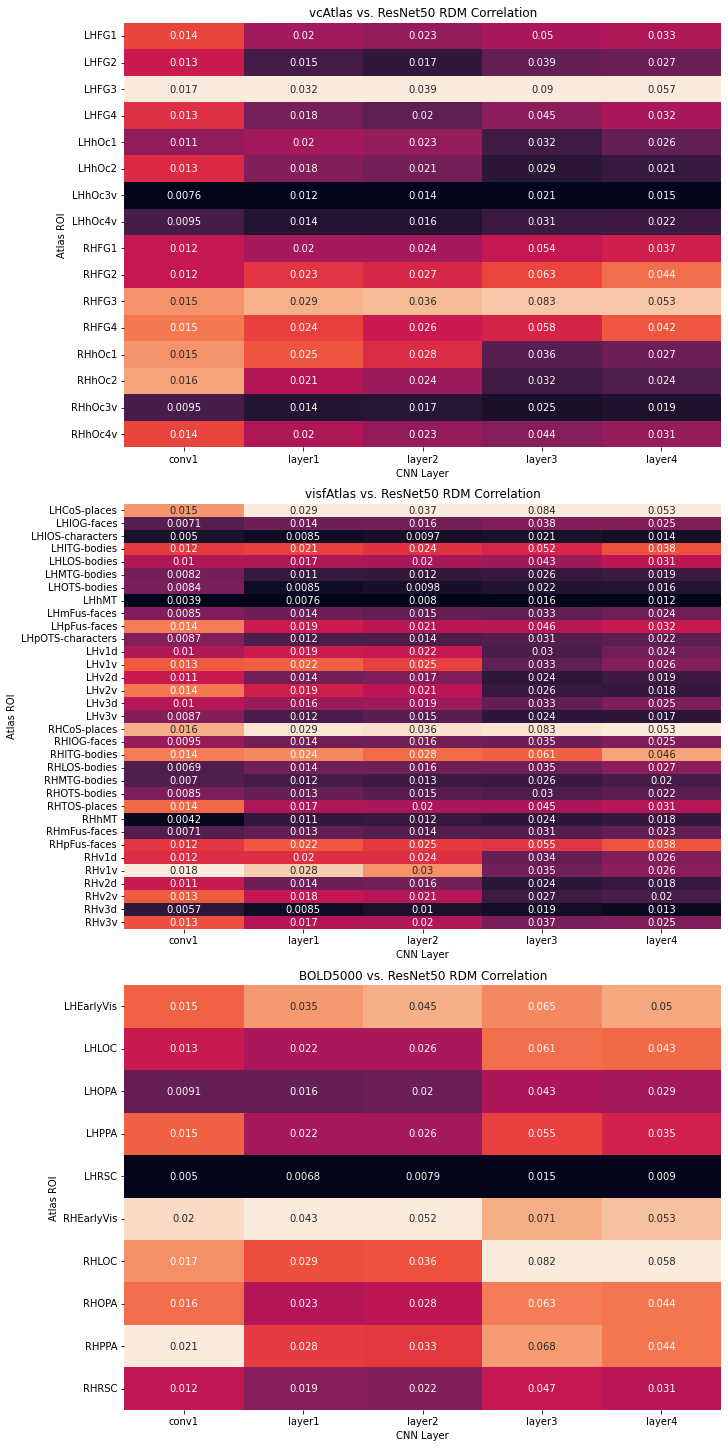

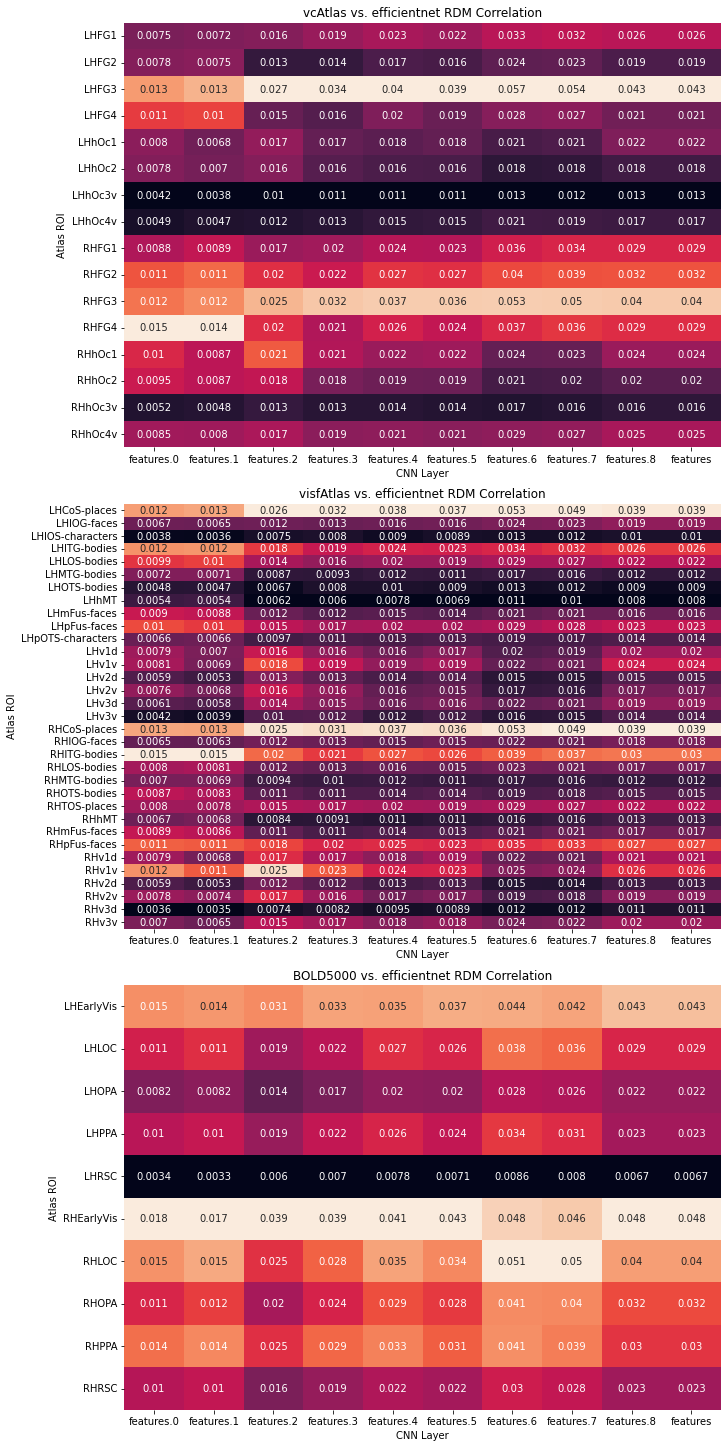

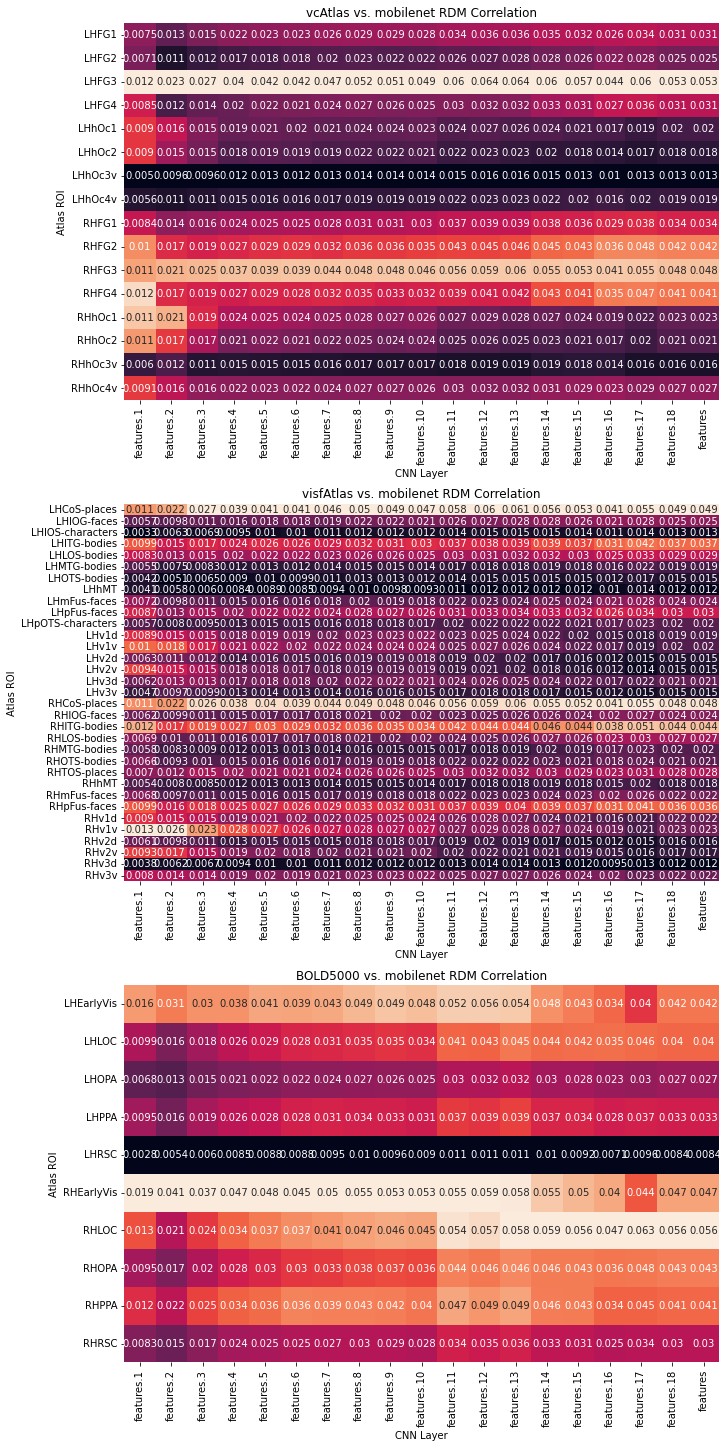

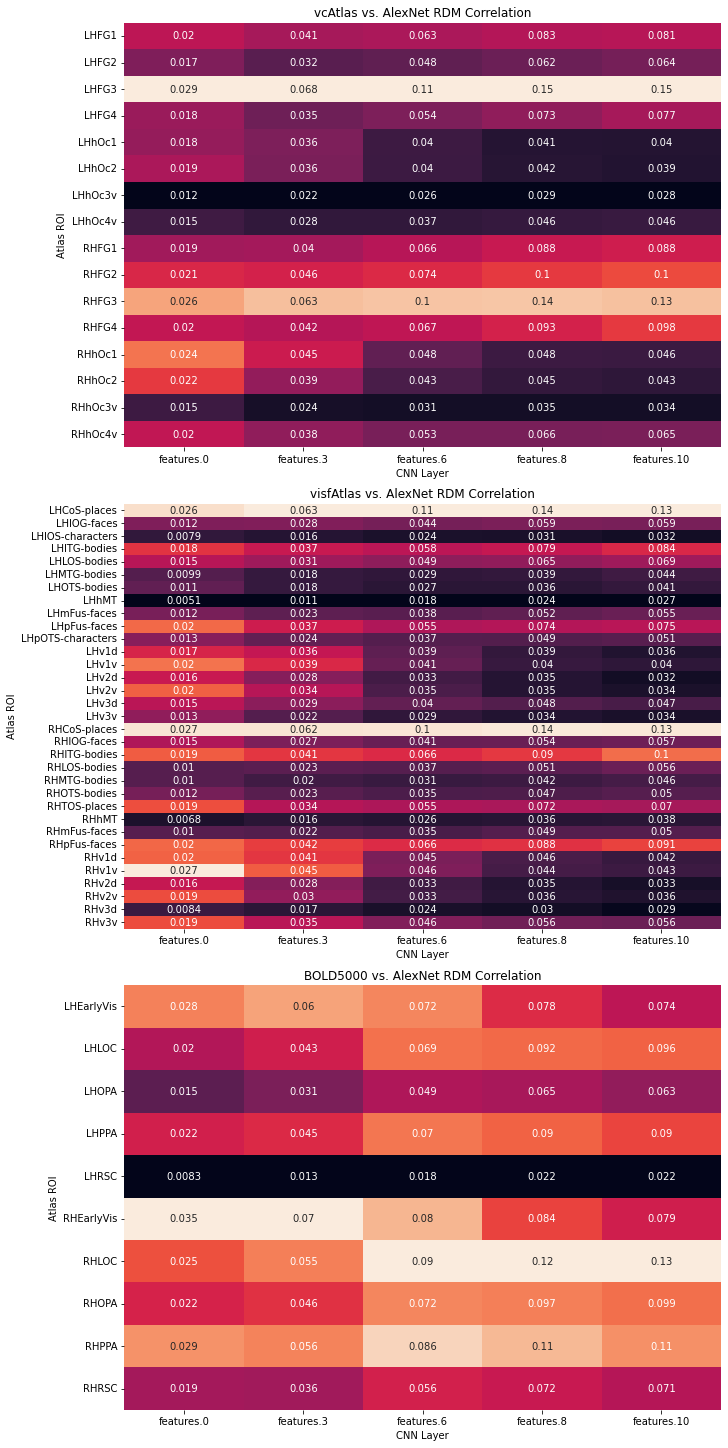

In [58]:
for dnn in corr.keys():
    fig, axes = plt.subplots(3,1,facecolor='white', figsize=(10,20), layout='constrained')
    for atlas, ax in zip(corr[dnn].keys(), axes):
        atlas_corr = corr[dnn][atlas]
        ax = sns.heatmap(col_norm(atlas_corr),
                         annot=atlas_corr,
                         xticklabels=labels[dnn],
                         yticklabels=labels[atlas],
                         ax=ax,
                         cbar=False)
        ax.set_title(f'{atlas} vs. {dnn} RDM Correlation')
        ax.set_xlabel('CNN Layer')
        ax.set_ylabel('Atlas ROI')

SyntaxError: invalid syntax (2195155061.py, line 2)